In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
n1=np.random.normal(0,1,(1000,2))
n2=np.random.normal(1,1,(1000,2))
n=np.concatenate([n1,n2])

y1=np.ones(1000)
y2=-1*np.ones(1000)
y=np.concatenate([y1,y2])

In [3]:
data=pd.DataFrame(data=np.concatenate([n,y.reshape(-1,1)],axis=1),columns=['x','y','target'])

In [4]:
data.target=data.target.astype('int32')

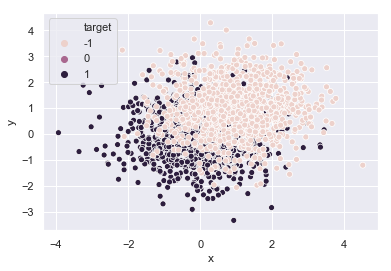

In [8]:
sns.scatterplot(data=data,x='x',y='y',hue='target')
plt.show()

In [9]:
GB=GradientBoostingClassifier()

In [10]:
GB.fit(n,y)

GradientBoostingClassifier()

In [11]:
ypred=GB.predict(n)
accuracy_score(ypred,y)

0.803

In [12]:
GB.n_estimators

100

In [111]:
class node:
    def __init__(self,tree=None,gamma=None):
        self.tree=tree
        self.gamma=gamma
        self.next=None
    
    def __del__(self):
        pass
    
    def insert(self,tree,gamma):
        
        if self.next is None:
            self.next=node(tree,gamma)
        else:
            return self.next.insert(tree,gamma)
    
    def output(self,x):
        if self.tree is not None:
            out=self.tree.predict(x)
        if self.next is None:
            return out*self.gamma
        else:
            return out*self.gamma+self.next.output(x)
        
class GradBoostClf:
    def __init__(self,n_iter):
        self.n_iter=n_iter
        self.head=None
        self.classes=None
        self.gamma0=None
    
    def __sigmoid(self,x):
        p=np.exp(x)/(1+np.exp(x))
        
        return p
    
    def __minima(self,h,F,y):
        g=0.1
        g_prev=0.1
        cl=self.classes[0]
        
        not_converged=True
        i=0
        while not_converged:
            p=self.__sigmoid(F+g*h)
            grad_dd=h*h*p*(1-p)
            grad_dd=grad_dd.sum()
            grad_d=h*(p-y)
            grad_d=grad_d.sum()
            
            delta=-grad_d/grad_dd
            g+=delta
            i+=1
            if np.abs(g_prev-g)<0.01:
                not_converged=False
            if i>10000:
                break
            g_prev=g
        #print(not_converged)
        return g
    
    def fit(self,x,y):
        self.head=node()
        self.classes=sorted(list(set(y)))
        self.dic={c:i for i,c in enumerate(self.classes)}
        cl=self.classes[0]
        
        yc=y.copy()
        yc[y==cl]=0
        yc[y!=cl]=1
        n1=(yc==1).sum()
        n0=(yc==0).sum()
        self.gamma0=np.log(n1/n0)
        
        #1st STEP
        F=self.gamma0
        p=n1/(n1+n0)*np.ones(x.shape[0])
        res=-p+yc
        tree=DecisionTreeRegressor(max_depth=3)
        tree.fit(x,res)
        h=tree.predict(x)
        gamma=self.__minima(h,F,yc)
        self.head.tree=tree
        self.head.gamma=gamma
        
        for i in range(1,self.n_iter):
            F=self.gamma0+self.head.output(x)
            p=self.__sigmoid(F)
            res=-p+yc
            tree=DecisionTreeRegressor(max_depth=3)
            tree.fit(x,res)
            h=tree.predict(x)
            gamma=self.__minima(h,F,yc)
            self.head.insert(tree,gamma)
            
    def predict(self,x):
        p=self.gamma0+self.head.output(x)
        p=self.__sigmoid(p)
        ycl=(p>=0.5).astype(int)
        ypred=ycl.copy()
        ypred[ycl==1]=self.classes[1]
        ypred[ycl==0]=self.classes[0]
        
        return ypred 
    
    def predict_prob(self,x):
        p=self.gamma0+self.head.output(x)
        p=self.__sigmoid(p)
        return p

In [116]:
gb=GradBoostClf(30)

In [117]:
gb.fit(n,y)

In [118]:
ypred=gb.predict(n)

In [119]:
accuracy_score(ypred,y)

0.8415

In [120]:
gb.predict_prob(n)

array([0.81445236, 0.86723064, 0.60370848, ..., 0.02799672, 0.15254967,
       0.05497926])

# Breat_Cancer dataset

In [69]:
from sklearn.datasets import load_breast_cancer

In [70]:
bcancer=load_breast_cancer()

In [72]:
data=bcancer['data']
target=bcancer['target']

In [76]:
data.shape

(569, 30)

In [77]:
GB.fit(data,target)

GradientBoostingClassifier()

In [78]:
ypred=GB.predict(data)

In [79]:
accuracy_score(ypred,target)

1.0

In [129]:
gb=GradBoostClf(1)

In [130]:
gb.fit(data,target)

In [122]:
gb.classes

[0, 1]

In [131]:
ypred=gb.predict(data)

In [132]:
accuracy_score(ypred,target)

0.9789103690685413

# Abalone dataset

In [26]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

--2020-11-04 18:36:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191873 (187K) [application/x-httpd-php]
Saving to: ‘abalone.data’

abalone.data        100%[===================>] 187.38K   368KB/s    in 0.5s    

2020-11-04 18:36:38 (368 KB/s) - ‘abalone.data’ saved [191873/191873]



In [27]:
ls

Adaboosting.ipynb               bias_variance_maxfeatures.png
Bias-Complexity.ipynb           bias_variance_multiple.png
DecisionTree.ipynb              bias_vs_complex_multiple.png
GradientBoosting.ipynb          bias_vs_complexity.png
Hughes_phenomenon.ipynb         lr_2classes.png
KNN.ipynb                       lr_3classes.png
Linear_classifiers.ipynb        optimal_bayes_classifier.ipynb
README.md                       p103p207.png
abalone.data                    statistical-tests.ipynb
bias_variance.ipynb             tree.dot


In [42]:
with open('abalone.data') as file:
    abalone=[]
    while True:
        line=file.readline()
        if line=='':
            break
        line=line.rstrip().split(',')
        abalone.append(line)

In [44]:
abalone=np.array(abalone)

In [54]:
target=abalone[:,-1].astype(int)

In [57]:
data_1=abalone[:,1:-1].astype(float)
data_0=abalone[:,0]

In [55]:
target

array([15,  7,  9, ...,  9, 10, 12])

In [59]:
data_1

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
enc=OneHotEncoder()

In [65]:
sex_ohe=enc.fit_transform(data_0.reshape(-1,1)).toarray()

In [66]:
data=np.concatenate([sex_ohe,data_1],axis=1)

In [67]:
data

array([[0.    , 0.    , 1.    , ..., 0.2245, 0.101 , 0.15  ],
       [0.    , 0.    , 1.    , ..., 0.0995, 0.0485, 0.07  ],
       [1.    , 0.    , 0.    , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.    , 0.    , 1.    , ..., 0.5255, 0.2875, 0.308 ],
       [1.    , 0.    , 0.    , ..., 0.531 , 0.261 , 0.296 ],
       [0.    , 0.    , 1.    , ..., 0.9455, 0.3765, 0.495 ]])

In [68]:
set(target)

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 29}